# <div> <center> <b> NN Arabic Handwriting Recognition </b> </center> </div>

## <b> Credentials: </b> (E-JUST Submission)
- Name: Yousef Ibrahim Gomaa Mahmoud
- ID: 320210207
- Group: 1
- Section: AID 3

## <b> Notebook Workflow: </b>
- Environment Setup
- Data Pre-processing
- Model Definition
- Training the Model
- Data Visualization
- Prediction

## <b> Introduction: </b>
<p> In this notebook, a model is to be trained to <b> recognize/classify arabic letters </b> using a convolutional neural network (CNN) through Keras, a TensorFlow tool. </p>

## <b> Dataset: </b>
https://www.kaggle.com/competitions/arabic-letters-classification

## Environment Setup:
### Importing Packages

In [86]:
# import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [47]:
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

: /physical_device:CPU:0
: /physical_device:GPU:0
: /physical_device:GPU:1


In [48]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test']
NUM_CLASS = 65
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64
SEED = 43
LABEL_NAMES = [i for i in range(NUM_CLASS)]

- There are 65 classes to classify into (0-64)
- Images must be resized to a consistent size in order to train properly.

In [49]:
# str = "user001_heh_middle_042.png"
# str[8:18]

In [50]:
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode="grayscale",
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [51]:
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode="grayscale",
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)


Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


In [52]:
class_names = train_images.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


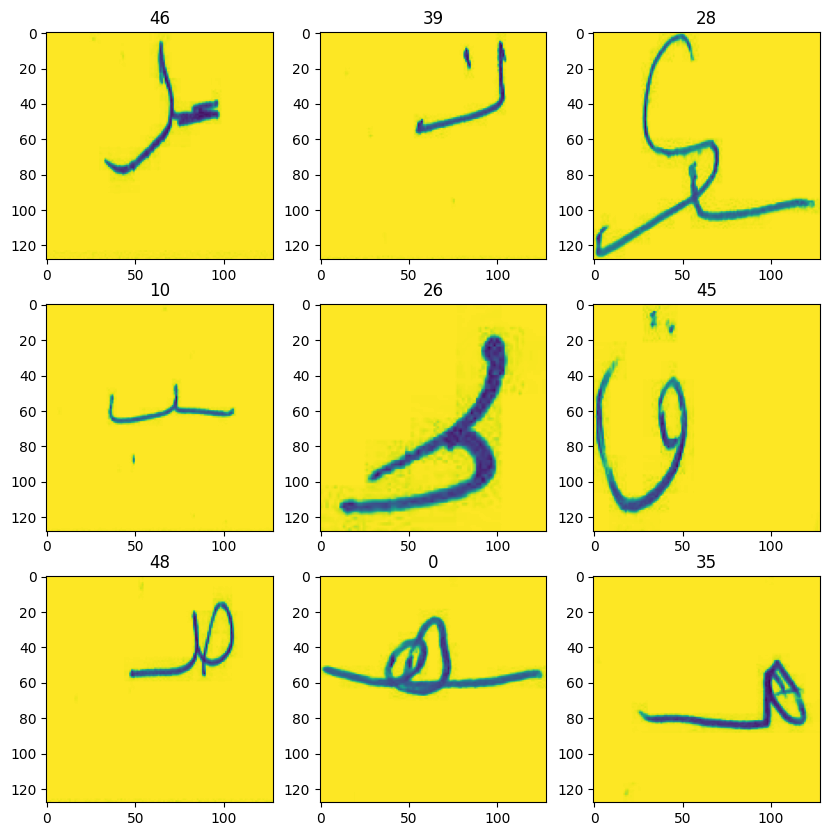

In [53]:
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])


In [54]:
for images, labels in train_images:
    print(images.shape)
    print(labels.shape)
    break

(64, 128, 128, 1)
(64,)


In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.build(input_shape=(None, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

### Model Optimization:

In [88]:
model.compile(optimizer = Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

### Model Training:

In [89]:
model.fit(train_images, validation_data=train_validation, epochs=100)

Epoch 1/100
532/532 [==============================] - 26s 45ms/step - loss: 51.8972 - accuracy: 0.0156 - val_loss: 51.9411 - val_accuracy: 0.0121
Epoch 2/100
532/532 [==============================] - 22s 41ms/step - loss: 51.6669 - accuracy: 0.0166 - val_loss: 51.9411 - val_accuracy: 0.0120
Epoch 3/100
532/532 [==============================] - 21s 40ms/step - loss: 51.6669 - accuracy: 0.0163 - val_loss: 51.9411 - val_accuracy: 0.0128
Epoch 4/100
532/532 [==============================] - 21s 39ms/step - loss: 51.6669 - accuracy: 0.0158 - val_loss: 51.9411 - val_accuracy: 0.0119
Epoch 5/100
532/532 [==============================] - 22s 41ms/step - loss: 51.6669 - accuracy: 0.0160 - val_loss: 51.9411 - val_accuracy: 0.0120
Epoch 6/100
532/532 [==============================] - 21s 39ms/step - loss: 51.6669 - accuracy: 0.0159 - val_loss: 51.9411 - val_accuracy: 0.0122
Epoch 7/100
532/532 [==============================] - 22s 41ms/step - loss: 51.6669 - accuracy: 0.0165 - val_loss: 51

KeyboardInterrupt: 